**#Import Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!eval $(ssh-agent -s)


Agent pid 1747


In [ ]:
!ls -l /content/drive/MyDrive/Colab\ Notebooks/id_rsa


In [5]:
!chmod 600 /content/drive/MyDrive/Colab\ Notebooks/id_rsa


In [6]:
!eval `ssh-agent -s`


Agent pid 2418


In [8]:
import os

# Start the SSH agent
os.system('eval "$(ssh-agent -s)"')

# Get the output of the SSH agent start command which contains the agent PID and socket
agent_output = !ssh-agent -s
print(agent_output)

# Extract and export the SSH_AUTH_SOCK environment variable
agent_vars = agent_output[0].split(';')
ssh_auth_sock = agent_vars[0].split('=')[1]
os.environ['SSH_AUTH_SOCK'] = ssh_auth_sock

# Verify that SSH_AUTH_SOCK is correctly set
print(os.environ['SSH_AUTH_SOCK'])


['SSH_AUTH_SOCK=/tmp/ssh-XXXXXXG3QhWh/agent.3022; export SSH_AUTH_SOCK;', 'SSH_AGENT_PID=3023; export SSH_AGENT_PID;', 'echo Agent pid 3023;']
/tmp/ssh-XXXXXXG3QhWh/agent.3022


In [9]:
!ssh-add /content/drive/MyDrive/Colab\ Notebooks/id_rsa


Identity added: /content/drive/MyDrive/Colab Notebooks/id_rsa (habtiefather@gmail.com)


In [16]:
!git config --global user.email "habtiefather@gmail.com"
!git config --global user.name "Habtamuyihun561"


In [20]:
!mkdir -p ~/.ssh
!chmod 700 ~/.ssh



In [22]:
!cp /content/drive/MyDrive/Colab\ Notebooks/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/Colab\ Notebooks/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!chmod 644 ~/.ssh/id_rsa.pub


In [23]:
!eval `ssh-agent -s`
!ssh-add ~/.ssh/id_rsa


Agent pid 12849
Identity added: /root/.ssh/id_rsa (habtiefather@gmail.com)


In [24]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!chmod 644 ~/.ssh/known_hosts


# github.com:22 SSH-2.0-babeld-9713928c


In [25]:
!git clone git@github.com:MAIA-Group-Project/AIA-ML-DL-Project.git


Cloning into 'AIA-ML-DL-Project'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), done.
Resolving deltas: 100% (1/1), done.


In [26]:
!ls


AIA-ML-DL-Project  drive  sample_data


In [28]:
%cd AIA-ML-DL-Project


/content/AIA-ML-DL-Project


In [ ]:
!mv "/content/drive/MyDrive/tooth_segmentation_and_abnormality_classification.ipynb" "/content/AIA_ML_DL_Project/"


In [ ]:
!git clone git@github.com:MAIA-Group-Project/AIA_ML_DL_Project.git



In [ ]:
# @title Import Libraries { display-mode: "both" }
import os
import zipfile
import json
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# @title Extract Dataset
# Define the path to dataset zip file in Google Drive
zip_file_path = '/content/drive/My Drive/X-ray panoramic radiography image dataset.zip'

# Define the directory where to extract the  dataset
extracted_dir_path = '/content/drive/My Drive/dataset'

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Dataset extracted successfully. Contents of the directory:")
print(extracted_files)

In [ ]:
# @title Dataset directory and sub folders
# Define the directory where the dataset is extracted
dataset_dir = '/content/drive/My Drive/dataset/X-ray panoramic radiography image dataset'

# Define paths to subfolders
radiographs_dir = os.path.join(dataset_dir, 'Radiographs')
segmentation_dir = os.path.join(dataset_dir, 'Segmentation/teeth_mask')
masks_dir = os.path.join(dataset_dir, 'Expert/mask')
expert_dir= os.path.join(dataset_dir, 'Expert')
expert_json_path = os.path.join(expert_dir, 'expert.json')

In [ ]:
# @title Function to load images from a directory { display-mode: "both" }
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
    return images

In [ ]:
# @title Function to display sample images { display-mode: "both" }
# Function to display sample images
def display_sample_images(directory, title):
    plt.figure(figsize=(15, 6))
    plt.suptitle(title, fontsize=16)
    for i, filename in enumerate(os.listdir(directory)[:5]):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
    plt.show()


In [ ]:
def display_sample_images2(original_directory, enhanced_directory, title):
    plt.figure(figsize=(15, 6))
    plt.suptitle(title, fontsize=16)
    for i, filename in enumerate(os.listdir(original_directory)[:5]):
        original_img_path = os.path.join(original_directory, filename)
        enhanced_img_path = os.path.join(enhanced_directory, filename)

        # Read original image and enhanced image
        original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
        enhanced_img = cv2.imread(enhanced_img_path, cv2.IMREAD_GRAYSCALE)

        # Plot the original image
        plt.subplot(2, 5, i+1)
        plt.imshow(original_img, cmap='gray')
        plt.axis('off')
        plt.title('Original ' + filename)

        # Plot the enhanced image
        plt.subplot(2, 5, i+6)
        plt.imshow(enhanced_img, cmap='gray')
        plt.axis('off')
        plt.title('Enhanced ' + filename)
    plt.show()


In [ ]:
# @title Display Sample Images
# Display sample radiographs
display_sample_images(radiographs_dir, 'Sample Radiographs')

# Display sample radiographs segmentations
display_sample_images(segmentation_dir, 'Sample Segmentation')

# Display sample abnormality location masks
display_sample_images(masks_dir, 'Sample Masks')

In [ ]:
# @title Extract JSON files
#
# Check if the 'expert.json' file exists
if os.path.exists(expert_json_path):
    # Open and read the contents of the 'expert.json' file
    with open(expert_json_path, 'r') as f:
        expert_data = json.load(f)

        # Loop through the first 10 entries in the JSON file
        for i, entry in enumerate(expert_data[:20]):
            print("Entry", i+1)
            print("-------------------")

            # Access label information
            labels = entry.get('Label', {}).get('objects', [])

            # Loop through each label object
            for label_obj in labels:
                title = label_obj.get('title')
                value = label_obj.get('value')
                if title and value:  # Check if title and value exist
                    print("Label:", title)
                    print("Value:", value)

                    # Access classifications if available
                    classifications = label_obj.get('classifications', [])
                    if classifications and isinstance(classifications, list):  # Check if classifications exist and is a list
                        print("Classifications:")
                        for classification in classifications:
                            if isinstance(classification, dict):  # Check if classification is a dictionary
                                class_title = classification.get('title')
                                class_value = classification.get('answer', {}).get('title')
                                if class_title and class_value:  # Check if class_title and class_value exist
                                    print("- {}: {}".format(class_title, class_value))

                    print()

            # Access description and external ID
            description = entry.get('Description')
            external_id = entry.get('External ID')
            if description:  # Check if description exists
                print("Description:", description)
            if external_id:  # Check if external ID exists
                print("External ID:", external_id)

            print("-------------------\n")
else:
    print("The 'expert.json' file does not exist in the 'Expert' folder.")

Entry 1
-------------------
Label: None
Value: none

Description: Within normal limits
External ID: 53.JPG
-------------------

Entry 2
-------------------
Label: None
Value: none

Description: Within normal limits
External ID: 823.JPG
-------------------

Entry 3
-------------------
Label: None
Value: none

Description: Within normal limits
External ID: 85.JPG
-------------------

Entry 4
-------------------
Label: None
Value: none

Description: Within normal limits
External ID: 855.JPG
-------------------

Entry 5
-------------------
Label: None
Value: none

Description: Within normal limits
External ID: 117.JPG
-------------------

Entry 6
-------------------
Label: Non-Odontogenic
Value: non-odontogenic
Classifications:
- Level one: Well Defined
- Level two: Radiopaque
- Level three: None
- Level four: Developmental

Description: There is a defined dense radiopacity in the right posterior mandible just superior to the inferior alveolar nerve canal and this is most consistent with a

**#Apply Preprocessing Techniques:**


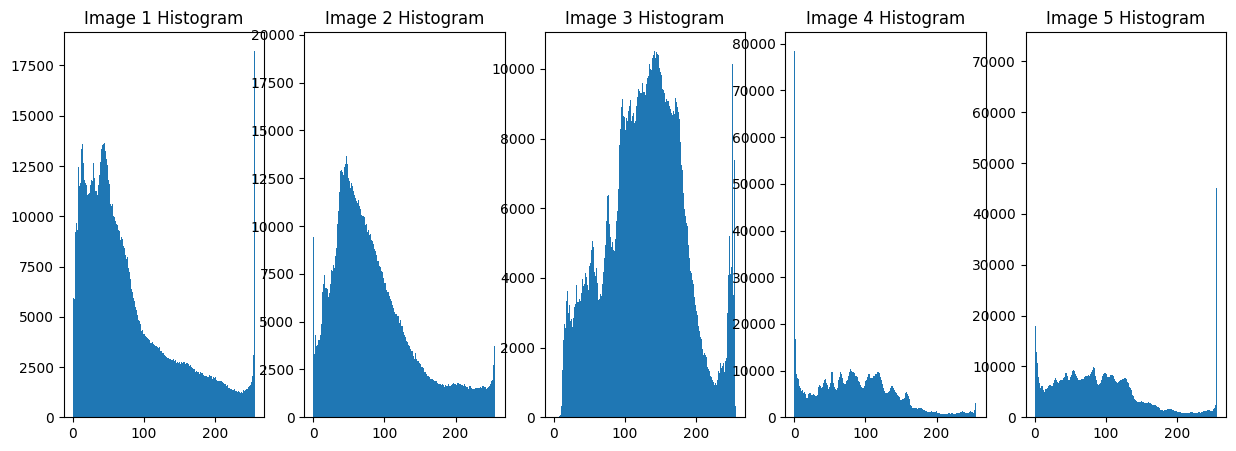

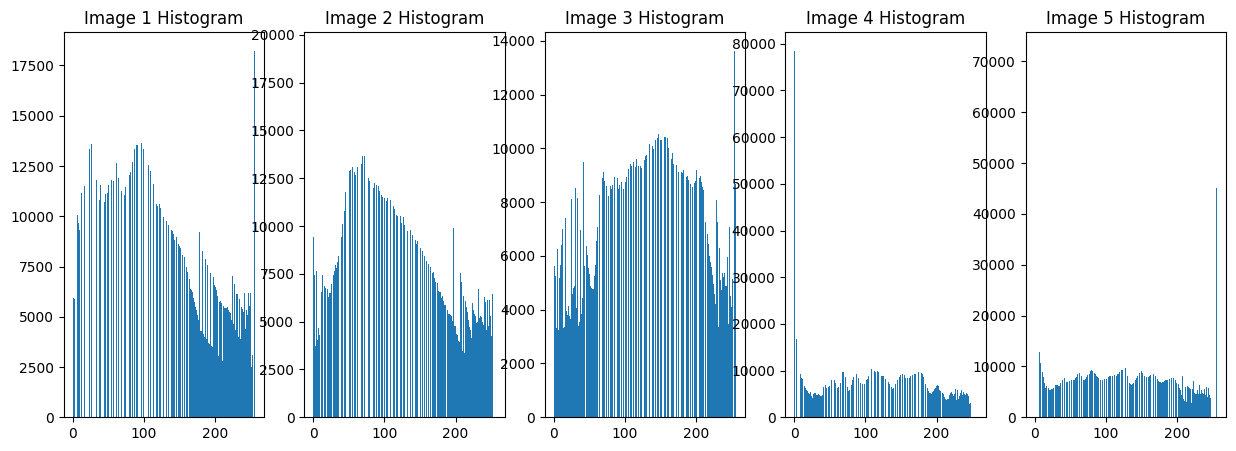

In [ ]:
# @title Histogram Equalization { display-mode: "both" }
# Function to apply histogram equalization
def equalize_histogram(images):
    equalized_images = [cv2.equalizeHist(img) for img in images]
    return equalized_images

# Function to plot histogram equalization
def plot_histogram(images):
    plt.figure(figsize=(15, 5))
    for i in range(5):  # Plot 5 sample images
        plt.subplot(1, 5, i+1)
        plt.hist(images[i].ravel(), bins=256, range=[0, 256])
        plt.title('Image ' + str(i+1) + ' Histogram')
    plt.show()

# Apply histogram equalization
radiograph_images = load_images_from_directory(radiographs_dir)
equalized_images = [cv2.equalizeHist(img) for img in radiograph_images]

# Plot histogram of original images
plot_histogram(radiograph_images)

# Plot histogram of equalized images
plot_histogram(equalized_images)

In [ ]:
# @title CLAHE { display-mode: "both" }
#Contrast Limited Adaptive Histogram Equalization
output_dir = "/content/drive/My Drive/dataset/CLAHE"
# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
# Parameters
clip_limit = 2.0
tile_grid_size = (8, 8)

# Iterate through images in the input directory
for filename in os.listdir(radiographs_dir):
    # Read the image
    img = cv2.imread(os.path.join(radiographs_dir, filename), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue  # Skip if the image cannot be read
    #Normalize images using min-max normalization
    normalized_image=cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clip_limit, tile_grid_size)
    enhanced_img = clahe.apply(normalized_image)

    # Save the enhanced image in the output directory
    cv2.imwrite(os.path.join(output_dir, filename), enhanced_img)

In [ ]:
# @title Spatial filtering { display-mode: "both" }

# Input and output directories
input_dir = "/content/drive/My Drive/dataset/CLAHE"
gaussian_dir= "/content/drive/My Drive/dataset/Denoised_Gausian"
median_dir = "/content/drive/My Drive/dataset/Denoised_Median"
bilateral_dir = "/content/drive/My Drive/dataset/Denoised_Bilateral"
non_local_means_dir = "/content/drive/My Drive/dataset/Denoised_NLM"

# Create output directory if it doesn't exist
os.makedirs(gaussian_dir, exist_ok=True)
os.makedirs(median_dir, exist_ok=True)
os.makedirs(bilateral_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Parameters for non-local means filtering
h_value = 10
search_window_size = 21
# Iterate through images in the input directory
for filename in os.listdir(input_dir):
    # Read the CLAHE-enhanced image
    img = cv2.imread(os.path.join(input_dir, filename), cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue  # Skip if the image cannot be read
    # Gaussian Filtering
    gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)
    cv2.imwrite(os.path.join(gaussian_dir, "gaussian_" + filename), gaussian_img)

    # Median Filtering
    median_img = cv2.medianBlur(img, 5)
    cv2.imwrite(os.path.join(median_dir , "median_" + filename), median_img)

    # Bilateral Filtering
    bilateral_img = cv2.bilateralFilter(img, 9, 75, 75)
    cv2.imwrite(os.path.join(bilateral_dir, "bilateral_" + filename), bilateral_img)

    # Apply non-local means filtering
    denoised_img = cv2.fastNlMeansDenoising(img, None, h=h_value, templateWindowSize=7, searchWindowSize=search_window_size)
    cv2.imwrite(os.path.join(non_local_means_dir , filename), denoised_img)


In [ ]:
# @title Grayscale Morphology { display-mode: "both" }
# Grayscale Morphology
#Function to apply greysacle morphology operations
def apply_morphology_operation(image):
  #define structutring element
  kernel_size=(15,20)
  kernel=cv2.getStructuringElement(cv2.MORPH_RECT,kernel_size)
  #apply erosion
  eroded=cv2.erode(image,kernel,iterations=1)
  #apply dialation
  dilated=cv2.dilate(eroded,kernel, iterations=1)
  #Apply opening
  opened=cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
  #aplly clossing
  closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
  #apply top_hat
  top_hat=cv2.morphologyEx(closed, cv2.MORPH_TOPHAT,kernel)
  return eroded, dilated, opened, closed, top_hat

In [ ]:
# folder containing denoised image
denoised_image_path = "/content/drive/My Drive/dataset/Denoised_Median"

# iterate over each image in the folder
for filename in os.listdir(denoised_image_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # read the image
        image_path = os.path.join(denoised_image_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Unable to read image {filename}")
            continue

        # apply grey sale operations
        eroded, dilated, opened, closed, top_hat = apply_morphology_operation(image)
        if eroded is None or dilated is None or opened is None or closed is None or top_hat is None:
            print(f"Error: Morphology operations failed for image {filename}")
            continue

        results_folder = "/content/drive/My Drive/dataset/MorphologyResults"
        os.makedirs(results_folder, exist_ok=True)
        cv2.imwrite(os.path.join(results_folder, 'eroded_' + filename), eroded)
        cv2.imwrite(os.path.join(results_folder, 'dilated_' + filename), dilated)
        cv2.imwrite(os.path.join(results_folder, 'opened_' + filename), opened)
        cv2.imwrite(os.path.join(results_folder, 'closed_' + filename), closed)
        cv2.imwrite(os.path.join(results_folder, 'top_hat_' + filename), top_hat)

print("Processing complete.")

Processing complete.


In [ ]:

# Function to apply grayscale erosion operation
def apply_erosion(image):
    kernel_size = (15, 15)  # Larger kernel size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    # Apply erosion
    eroded = cv2.erode(image, kernel, iterations=1)

    return eroded

# Folder containing denoised images
denoised_image_path = "/content/drive/My Drive/dataset/Denoised_Median"

# List all image files
image_files = [os.path.join(denoised_image_path, filename) for filename in os.listdir(denoised_image_path)
               if filename.endswith(".jpg") or filename.endswith(".png")]

# Process only the first five images
for image_file in image_files[:5]:
    print(f"Processing image: {image_file}")

    # Read the image
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image {image_file}")
        continue

    # Apply grayscale erosion operation
    try:
        eroded = apply_erosion(image)
    except Exception as e:
        print(f"Error applying erosion operation to {image_file}: {e}")
        continue

    # Check if the eroded image is not None
    if eroded is None:
        print("Error: Erosion operation failed.")
        continue

    # Display the eroded image
    cv2_imshow(eroded)

    # Save the eroded image
    results_folder = "/content/drive/My Drive/dataset/MorphologyResults"
    os.makedirs(results_folder, exist_ok=True)
    cv2.imwrite(os.path.join(results_folder, 'eroded_' + os.path.basename(image_file)), eroded)

    print("Eroded image saved.")

print("Processing complete.")


Processing complete.


In [ ]:

# Function to apply grayscale morphology operations
def apply_morphology_operation(image):
    kernel_size = (10, 20)  # Larger kernel size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    # Apply erosion
    eroded = cv2.erode(image, kernel, iterations=1)

    # Apply dilation
    dilated = cv2.dilate(eroded, kernel, iterations=1)
    #Apply opening
    opened=cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
  #aplly clossing
    closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
  #apply top_hat
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)


    return eroded, dilated, opened, closed, top_hat
# Create a folder to save morphology results
results_folder = "/content/drive/My Drive/dataset/MorphologyResults"
os.makedirs(results_folder, exist_ok=True)

# Folder containing denoised images
denoised_image_path = "/content/drive/My Drive/dataset/Denoised_Median"

# Display sample images
#display_sample_images(denoised_image_path, 'Sample Radiographs')

# Apply morphology operations on the sample images
for filename in os.listdir(denoised_image_path)[:5]:
    image_path = os.path.join(denoised_image_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image {filename}")
        continue

    # Apply grayscale operations
    eroded, dilated, opened,closed, top_hat = apply_morphology_operation(image)

    # Check if outputs are not None
    if eroded is None or dilated is None:
        print("Error: Morphology operations failed.")
        continue
     # Save eroded and dilated images
    eroded_filename = os.path.join(results_folder, 'eroded_' + filename)
    dilated_filename = os.path.join(results_folder, 'dilated_' + filename)
    opened_filename = os.path.join(results_folder, 'opened_' + filename)
    closed_filename = os.path.join(results_folder, 'closed_' + filename)
    top_hat_filename = os.path.join(results_folder, 'top_hat_' + filename)
    cv2.imwrite(eroded_filename, eroded)
    cv2.imwrite(dilated_filename, dilated)
    cv2.imwrite(opened_filename, opened)
    cv2.imwrite(closed_filename, closed)
    cv2.imwrite(top_hat_filename, top_hat)




In [ ]:

# Function to apply top hat operation
def apply_top_hat(image):
    equalized = cv2.equalizeHist(image)
    # Define structuing element
    kernel_size = (3000,3500)  # Kernel size for top hat operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

    # Apply top hat
    top_hat = cv2.morphologyEx(equalized, cv2.MORPH_TOPHAT, kernel)

    return top_hat

# Create a folder to save top hat results
results_folder = "/content/drive/My Drive/dataset/TopHatResults2"
os.makedirs(results_folder, exist_ok=True)

# Folder containing grayscale images
image_folder = "/content/drive/My Drive/dataset/Denoised_NLM"

# Apply top hat operation on the sample images
for filename in os.listdir(image_folder)[:10]:
    image_path = os.path.join(image_folder, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image {filename}")
        continue

    # Apply top hat operation
    top_hat = apply_top_hat(image)

    # Save the top hat result
    cv2.imwrite(os.path.join(results_folder, 'top_hat_' + filename), top_hat)

    print(f"Top hat operation applied on {filename} and saved.")

print("Processing complete. Top hat results saved in TopHatResults folder.")


#**Segmentation**

In [ ]:
# @title Default title text
# Folder containing the preprocessed images
preprocessed_folder = "/content/drive/My Drive/dataset/TopHatResults"

# Output folder for segmented teeth
output_folder = "/content/drive/My Drive/dataset/SegmentedTeeth"
os.makedirs(output_folder, exist_ok=True)

# Process the first five images
for filename in os.listdir(preprocessed_folder)[:5]:
    # Read the preprocessed image
    image_path = os.path.join(preprocessed_folder, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a binary mask for teeth segmentation
    _, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area and shape
    min_area = 1000  # Adjust as needed
    max_aspect_ratio = 5  # Adjust as needed
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h if h != 0 else 0

        if area > min_area and aspect_ratio < max_aspect_ratio:
            filtered_contours.append(contour)

    # Create a mask of the filtered contours
    teeth_mask = np.zeros_like(image, dtype=np.uint8)
    cv2.drawContours(teeth_mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Save segmented teeth image
    output_path = os.path.join(output_folder, f"{filename[:-4]}_segmented.jpg")
    cv2.imwrite(output_path, teeth_mask)

    print(f"Tooth segmentation completed for {filename}")

print("Segmentation completed for all images.")


In [ ]:
# @title Default title text
import numpy as np
import cv2

def thresholding_based_segmentation(image, threshold_value):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to obtain the binary segmentation mask
    _, binary_mask = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Find connected components (regions) in the binary mask
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask)

    #Create a color image for visualization purposes
    colored_image = np.zeros_like(image)

    #Assign random colors to each segmented region
    for label in range(1, np.max(labels)+1):
        if stats[label, cv2.CC_STAT_AREA] > 100:  # Filter out small regions (adjust threshold as needed)
           colored_image[labels == label] = np.random.randint(0, 256, 3)

    return colored_image

# Example usage:
if __name__ == "__main__":
    # Replace 'your_image_path' with the actual path to your image
    image_path = preprocessed_folder = "/content/drive/My Drive/dataset/TopHatResults2/top_hat_1008.JPG"
    original_image = cv2.imread(image_path)

    # Replace 'your_threshold_value' with the desired threshold value (0-255)
    threshold_value = 60

    segmented_image = thresholding_based_segmentation(original_image, threshold_value)

    # Display the original and segmented images
    cv2_imshow( original_image)
    cv2_imshow(segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


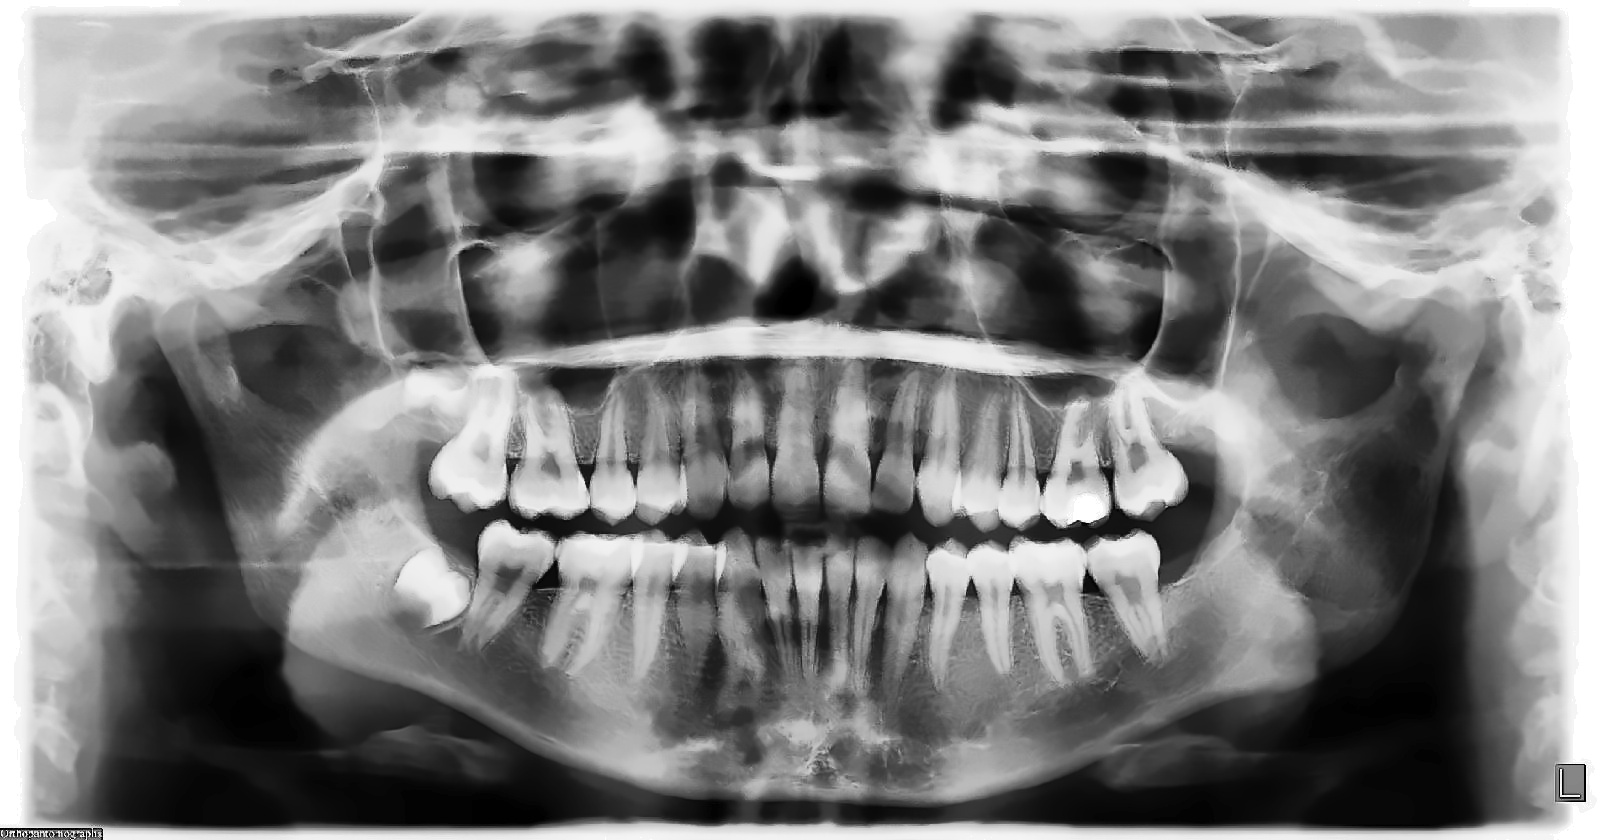

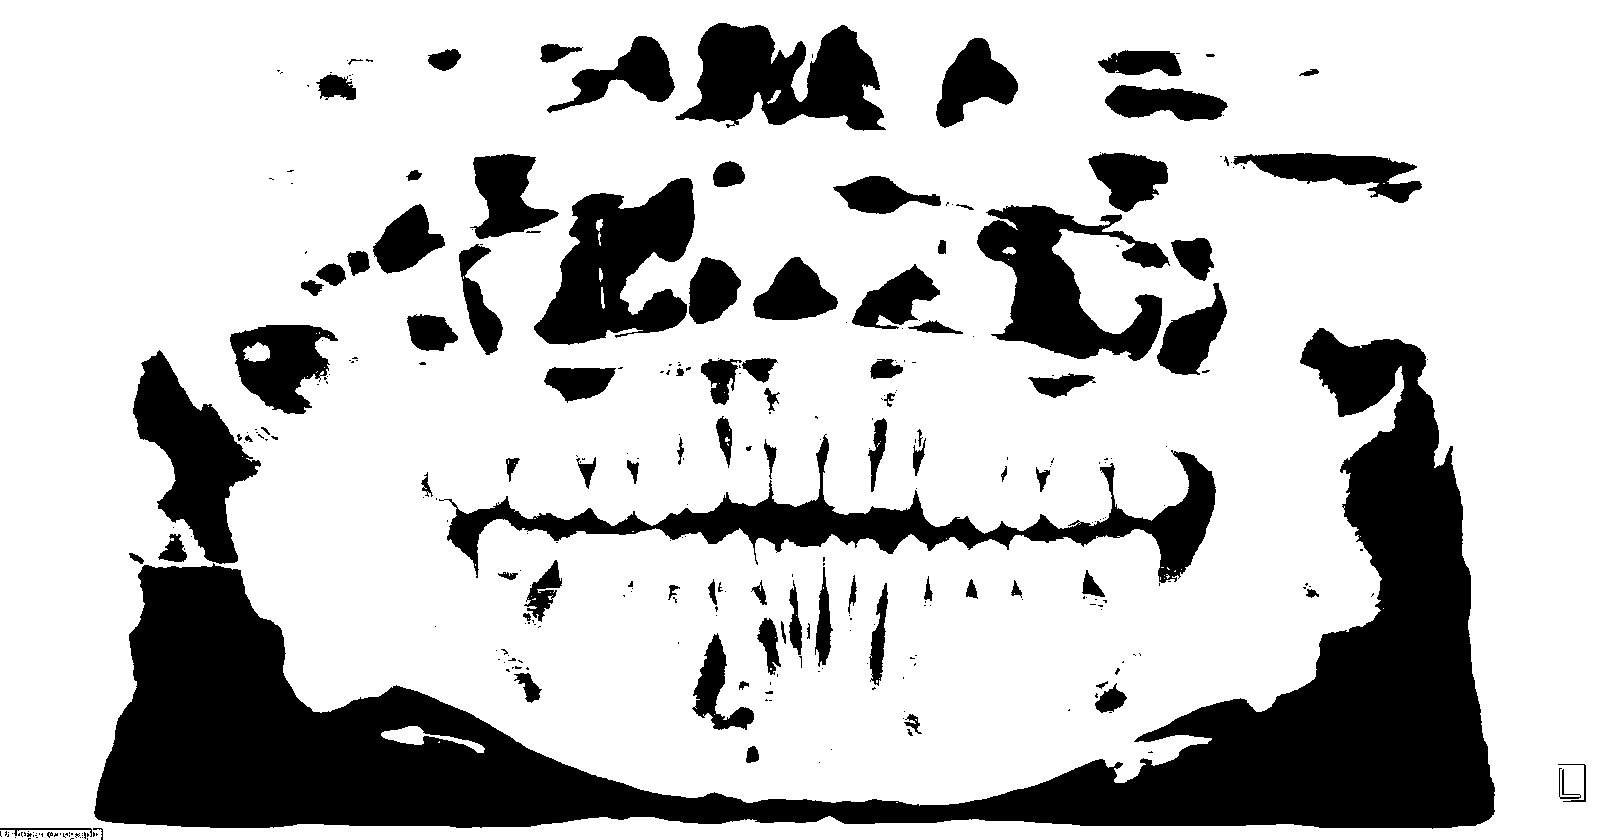

In [ ]:
import cv2

def thresholding_based_segmentation(image, threshold_value):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to obtain the binary segmentation mask
    _, binary_mask = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    return binary_mask

# Example usage:
if __name__ == "__main__":
    # Replace 'your_image_path' with the actual path to your image
    image_path = "/content/drive/My Drive/dataset/TopHatResults2/top_hat_1008.JPG"
    original_image = cv2.imread(image_path)

    # Replace 'your_threshold_value' with the desired threshold value (0-255)
    threshold_value = 60

    segmented_image = thresholding_based_segmentation(original_image, threshold_value)

    # Display the original and segmented images
    cv2_imshow( original_image)
    cv2_imshow(segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


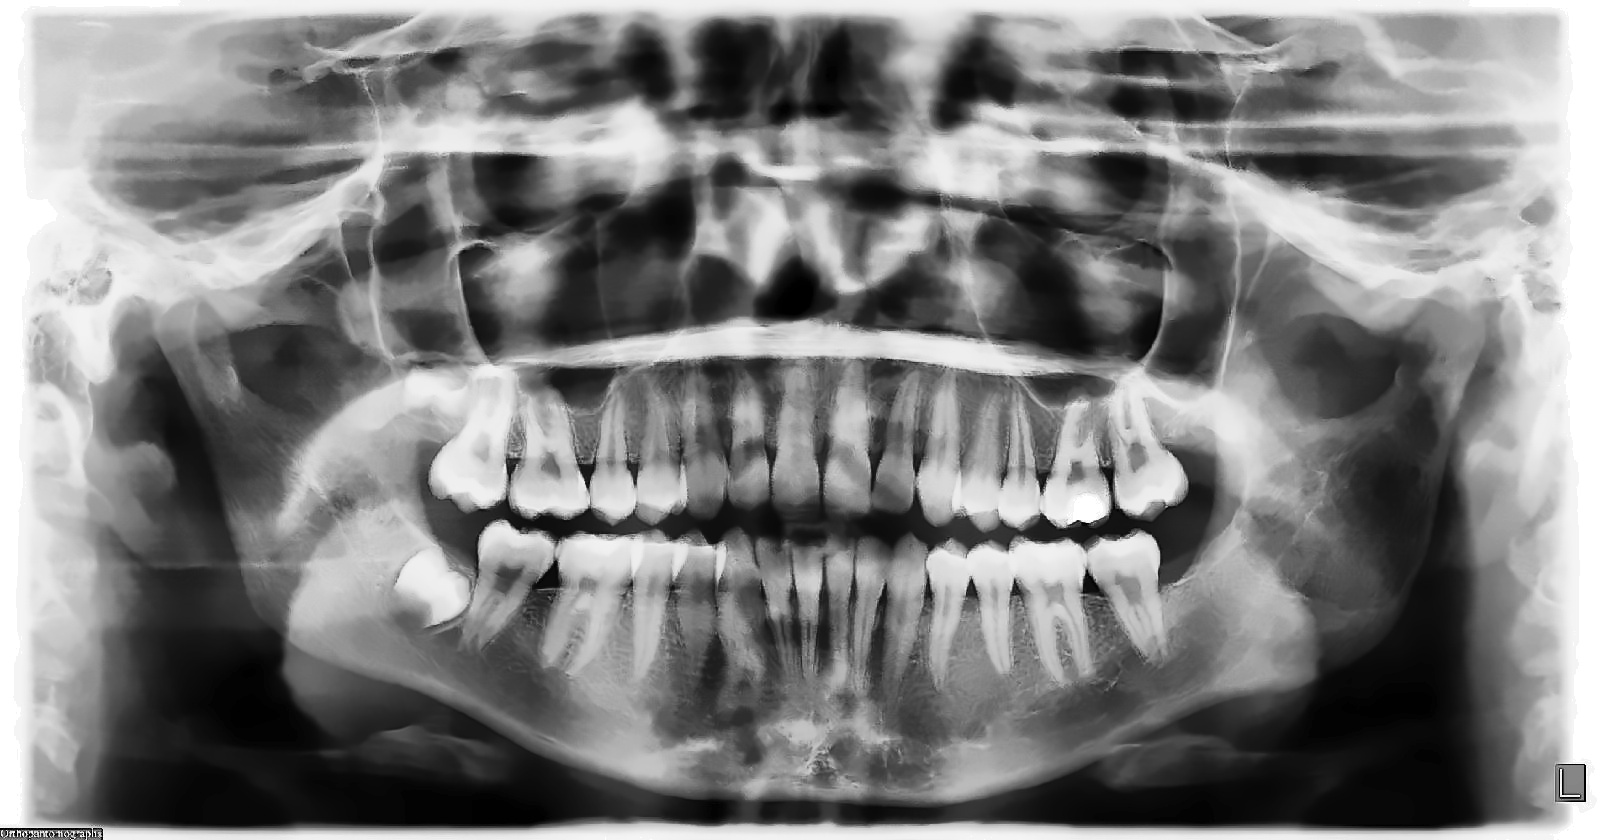

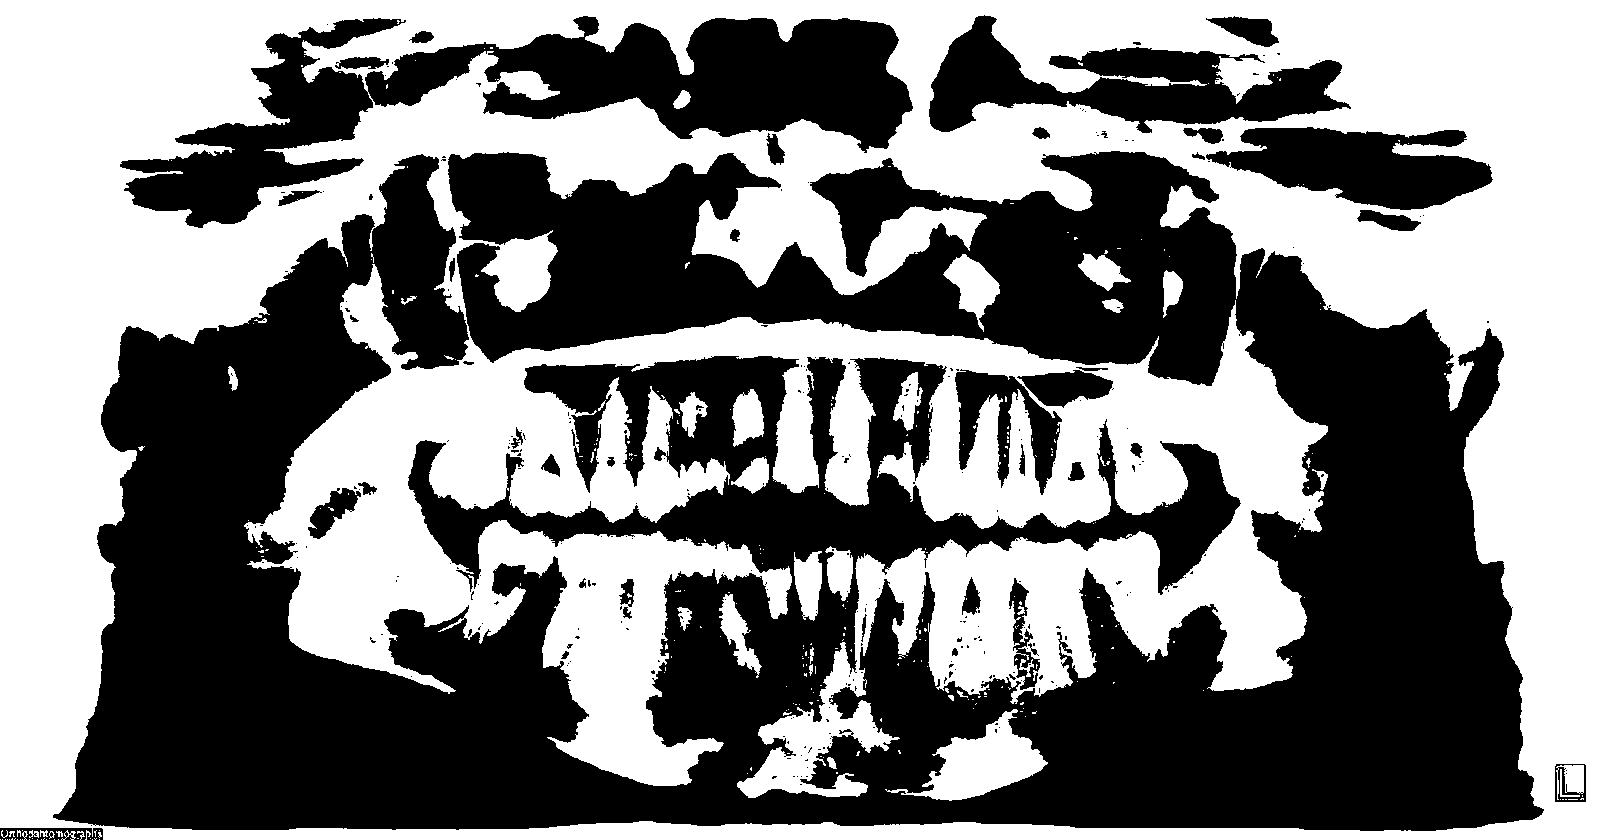

In [ ]:
import cv2

def thresholding_based_segmentation(image):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to obtain the binary segmentation mask
    _, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    return binary_mask

# Example usage:
if __name__ == "__main__":
    # Replace 'your_image_path' with the actual path to your image
    image_path = "/content/drive/My Drive/dataset/TopHatResults2/top_hat_1008.JPG"
    original_image = cv2.imread(image_path)

    # Obtain the segmented image using thresholding
    segmented_image = thresholding_based_segmentation(original_image)

    # Display the original and segmented images
    cv2_imshow( original_image)
    cv2_imshow(segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2

def region_growing(image, seed, threshold):
    # Create an empty binary mask to store the segmented region
    region_mask = np.zeros(image.shape, dtype=np.uint8)

    # Get the seed coordinates
    seed_x, seed_y = seed

    # Create a queue to store the pixels to be processed
    queue = []
    queue.append((seed_x, seed_y))

    # Define the connectivity (4-connectivity in this case)
    connectivity = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    # Perform region growing
    while len(queue) > 0:
        x, y = queue.pop(0)

        # Check if the pixel is within the image boundaries
        if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
            continue

        # Check if the pixel has already been visited
        if region_mask[x, y] != 0:
            continue

        # Calculate the similarity measure
        similarity = abs(image[x, y] - image[seed_x, seed_y])

        # Check if the pixel is similar to the seed pixel
        if similarity < threshold:
            region_mask[x, y] = 255  # Add the pixel to the region
            # Add the neighbors to the queue for further processing
            for dx, dy in connectivity:
                queue.append((x + dx, y + dy))

    return region_mask

# Example usage:
if __name__ == "__main__":
    # Load an image (replace 'image_path' with the path to your image)
    image = cv2.imread("/content/drive/My Drive/dataset/TopHatResults2/top_hat_1008.JPG", cv2.IMREAD_GRAYSCALE)

    # Define the seed coordinates (you can choose the seed manually or automatically)
    seed_coordinates = (100, 100)

    # Set the similarity threshold (adjust this value based on your image and task)
    threshold = 1000

    # Perform region growing segmentation
    segmented_region = region_growing(image, seed_coordinates, threshold)

    # Display the original image and the segmented region
    cv2_imshow(image)
    cv2_imshow(segmented_region )
    cv2.waitKey(0)
    cv2.destroyAllWindows()
